### dataset 5 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Step 1: Read the dataset 
df = pd.read_csv('Used_Bikes.csv')
df

bike_name     price       city  kms_driven  \
0        TVS Star City Plus Dual Tone 110cc   35000.0  Ahmedabad     17654.0   
1               Royal Enfield Classic 350cc  119900.0      Delhi     11000.0   
2                      Triumph Daytona 675R  600000.0      Delhi       110.0   
3                      TVS Apache RTR 180cc   65000.0  Bangalore     16329.0   
4      Yamaha FZ S V 2.0 150cc-Ltd. Edition   80000.0  Bangalore     10000.0   
...                                     ...       ...        ...         ...   
32643                Hero Passion Pro 100cc   39000.0      Delhi     22000.0   
32644                  TVS Apache RTR 180cc   30000.0     Karnal      6639.0   
32645              Bajaj Avenger Street 220   60000.0      Delhi     20373.0   
32646             Hero Super Splendor 125cc   15600.0     Jaipur     84186.0   
32647                    Bajaj Pulsar 150cc   22000.0       Pune     60857.0   

             owner   age  power          brand  
0      First Owner   3.0  110.0            TVS  
1      First Owner   4.0  350.0  Royal Enfield  
2      First Owner   8.0  675.0        Triumph  
3      First Owner   4.0  180.0            TVS  
4      First Owner   3.0  150.0         Yamaha  
...            ...   ...    ...            ...  
32643  First Owner   4.0  100.0           Hero  
32644  First Owner   9.0  180.0            TVS  
32645  First Owner   6.0  220.0          Bajaj  
32646  First Owner  16.0  125.0           Hero  
32647  First Owner  13.0  150.0          Bajaj  

[32648 rows x 8 columns]

In [4]:
df.head()

bike_name     price       city  kms_driven  \
0    TVS Star City Plus Dual Tone 110cc   35000.0  Ahmedabad     17654.0   
1           Royal Enfield Classic 350cc  119900.0      Delhi     11000.0   
2                  Triumph Daytona 675R  600000.0      Delhi       110.0   
3                  TVS Apache RTR 180cc   65000.0  Bangalore     16329.0   
4  Yamaha FZ S V 2.0 150cc-Ltd. Edition   80000.0  Bangalore     10000.0   

         owner  age  power          brand  
0  First Owner  3.0  110.0            TVS  
1  First Owner  4.0  350.0  Royal Enfield  
2  First Owner  8.0  675.0        Triumph  
3  First Owner  4.0  180.0            TVS  
4  First Owner  3.0  150.0         Yamaha

In [5]:
df.tail()

bike_name    price    city  kms_driven        owner  \
32643     Hero Passion Pro 100cc  39000.0   Delhi     22000.0  First Owner   
32644       TVS Apache RTR 180cc  30000.0  Karnal      6639.0  First Owner   
32645   Bajaj Avenger Street 220  60000.0   Delhi     20373.0  First Owner   
32646  Hero Super Splendor 125cc  15600.0  Jaipur     84186.0  First Owner   
32647         Bajaj Pulsar 150cc  22000.0    Pune     60857.0  First Owner   

        age  power  brand  
32643   4.0  100.0   Hero  
32644   9.0  180.0    TVS  
32645   6.0  220.0  Bajaj  
32646  16.0  125.0   Hero  
32647  13.0  150.0  Bajaj

In [6]:
df.shape

(32648, 8)

In [7]:
df.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [8]:
print(df.columns)

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')


In [9]:
# Step 2:

In [10]:
df.describe()

price     kms_driven           age         power
count  3.264800e+04   32648.000000  32648.000000  32648.000000
mean   6.829542e+04   26344.625184      8.048211    213.511302
std    9.071860e+04   22208.527695      4.031700    134.428868
min    4.400000e+03       1.000000      1.000000    100.000000
25%    2.500000e+04   12000.000000      5.000000    150.000000
50%    4.300000e+04   20373.000000      7.000000    150.000000
75%    8.000000e+04   35000.000000     10.000000    220.000000
max    1.900000e+06  750000.000000     63.000000   1800.000000

In [11]:
# Step 3: Data Visualization

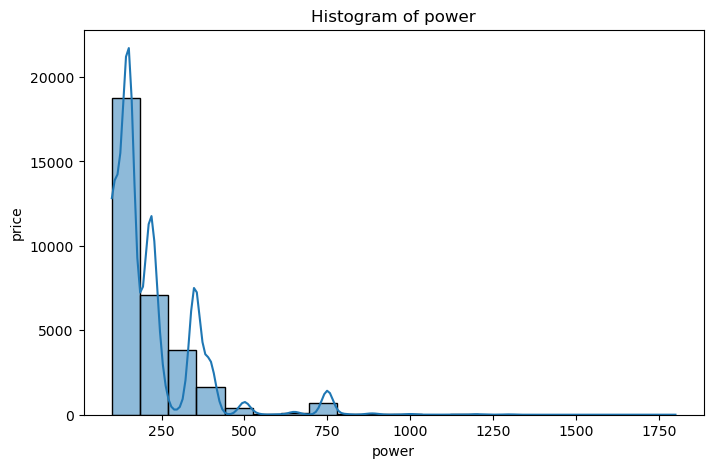

In [12]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['power'], bins=20, kde=True)
plt.title('Histogram of power')
plt.xlabel('power')
plt.ylabel('price')
plt.show()

In [13]:
df.value_counts('city')

city
Delhi        7318
Bangalore    2723
Mumbai       2591
Hyderabad    2160
Pune         1724
             ... 
Jajpur          1
Banka           1
Parola          1
Pathankot       1
Zirakpur        1
Length: 443, dtype: int64

In [14]:
df.value_counts('owner')

owner
First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
dtype: int64

In [15]:
df.value_counts('brand')

brand
Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
dtype: int64

([<matplotlib.patches.Wedge at 0x128923e89d0>,
 [Text(-1.0916391876244453, -0.1353657417615005, 'First Owner'),
  Text(0.10862750436219802, -1.0946232526746547, 'Fourth Owner Or More'),
  Text(1.0928393824434972, -0.1253079573710942, 'Second Owner'),
  Text(0.09854327309934756, 1.0955771188405077, 'Third Owner')],
 [Text(-0.595439556886061, -0.07383585914263663, '26.1%'),
  Text(0.05925136601574437, -0.5970672287316298, '23.1%'),
  Text(0.5960942086055439, -0.06834979492968775, '20.1%'),
  Text(0.05375087623600775, 0.5975875193675495, '30.6%')])

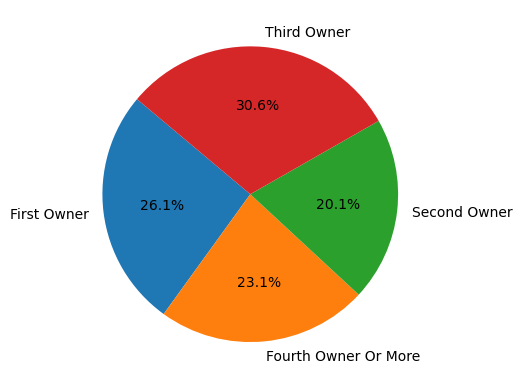

In [16]:
grouped_data = df.groupby('owner')['price'].mean()
plt.pie(x=grouped_data,autopct='%1.1f%%',labels=grouped_data.index,startangle=140)

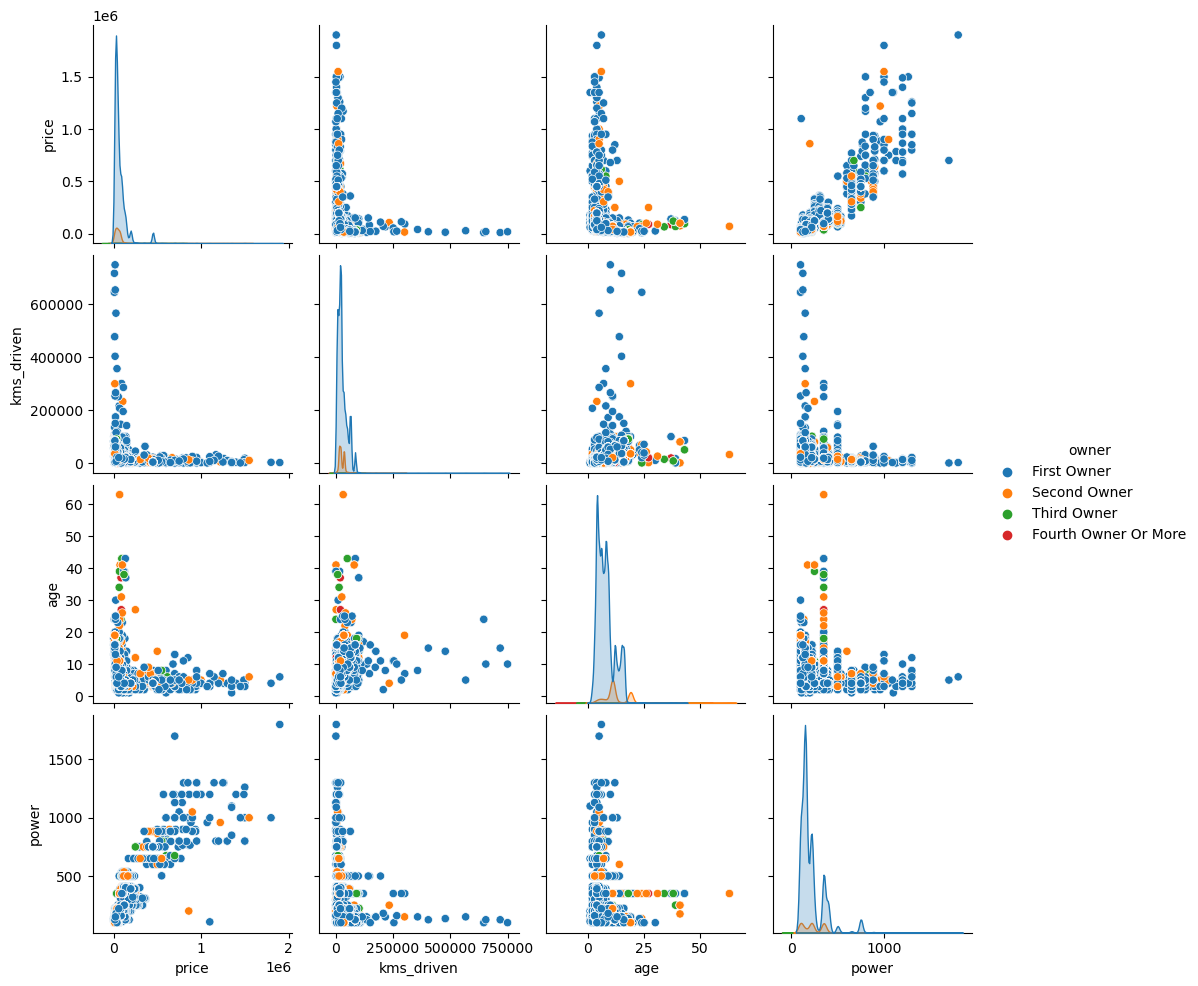

In [18]:
sns.pairplot(df, hue='owner')

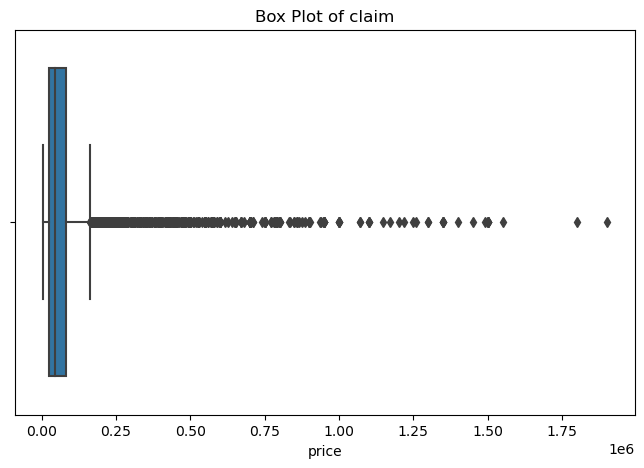

In [19]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Box Plot of claim')
plt.xlabel('price')
plt.show()

In [20]:
## Data Preprocessing :

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [22]:
df.isnull()

bike_name  price   city  kms_driven  owner    age  power  brand
0          False  False  False       False  False  False  False  False
1          False  False  False       False  False  False  False  False
2          False  False  False       False  False  False  False  False
3          False  False  False       False  False  False  False  False
4          False  False  False       False  False  False  False  False
...          ...    ...    ...         ...    ...    ...    ...    ...
32643      False  False  False       False  False  False  False  False
32644      False  False  False       False  False  False  False  False
32645      False  False  False       False  False  False  False  False
32646      False  False  False       False  False  False  False  False
32647      False  False  False       False  False  False  False  False

[32648 rows x 8 columns]

In [23]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [24]:
df.shape

(32648, 8)

In [25]:
df_num = df.select_dtypes('number')
df_num.shape

(32648, 4)

In [26]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
lower_bound

price        -57500.0
kms_driven   -22500.0
age              -2.5
power            45.0
dtype: float64

In [28]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [29]:
df= df.drop(['bike_name','city'],axis=1)

In [30]:
X = df.drop('price', axis=1)
y = df.price
X.head()

kms_driven        owner  age  power   brand
0     17654.0  First Owner  3.0  110.0     TVS
3     16329.0  First Owner  4.0  180.0     TVS
4     10000.0  First Owner  3.0  150.0  Yamaha
5     25000.0  First Owner  6.0  150.0  Yamaha
6      8200.0  First Owner  3.0  160.0   Honda

In [31]:
X_num = X.select_dtypes('number')
X_num.head()

kms_driven  age  power
0     17654.0  3.0  110.0
3     16329.0  4.0  180.0
4     10000.0  3.0  150.0
5     25000.0  6.0  150.0
6      8200.0  3.0  160.0

In [32]:
X_cat = X.select_dtypes('object')
X_cat.head()

owner   brand
0  First Owner     TVS
3  First Owner     TVS
4  First Owner  Yamaha
5  First Owner  Yamaha
6  First Owner   Honda

In [33]:
# Step 4: Rescale 
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [34]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [35]:
X_num_scaled.describe()

kms_driven           age         power
count  24320.000000  24320.000000  24320.000000
mean       0.386135      0.444819      0.285520
std        0.261932      0.220915      0.209098
min        0.000000      0.000000      0.000000
25%        0.172861      0.250000      0.119048
50%        0.317688      0.437500      0.238095
75%        0.539192      0.562500      0.476190
max        1.000000      1.000000      1.000000

In [36]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [37]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [38]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((24320, 20), (24320, 3), (24320, 17))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(19456, 20)
(4864, 20)
(19456,)
(4864,)


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [42]:
k_values = np.arange(1, 40, 1)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors= k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X_train, y_train, cv=3, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

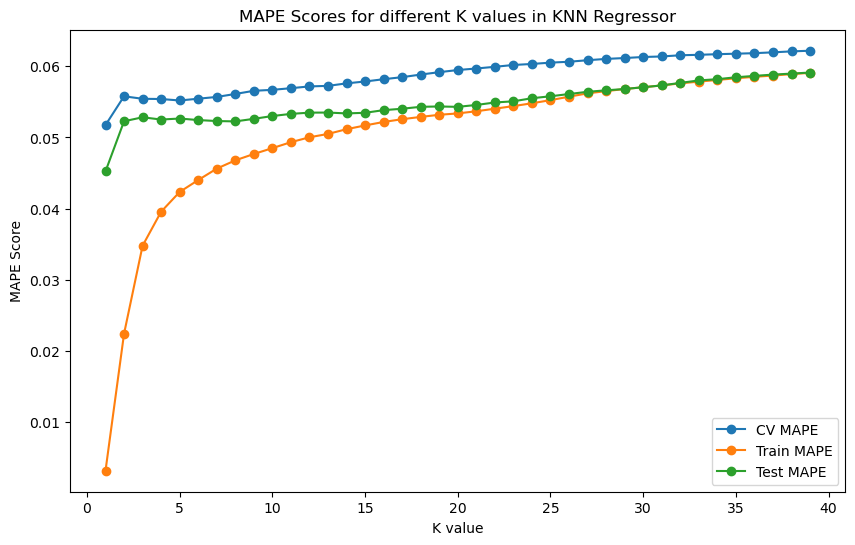

The best K value for CV is 1.


In [43]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")